In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from matplotlib.dates import MonthLocator

from datetime import datetime 
from pandas.tseries.offsets import DateOffset

### Data Processing

In [75]:
df = pd.read_csv('case.csv')
df

,y,x1,x2,x3,x4,x5
0,NaN,2.456,4.00,1386.96,6.4,406426
1,104.7474,2.837,4.04,1462.59,4.4,405948
2,104.8129,2.578,3.56,1736.47,4.6,405466
3,104.4135,2.793,3.13,1688.85,18.0,403957
4,104.4852,3.283,3.10,1822.57,4.4,400415
...,...,...,...,...,...,...
270,93.1620,0.896,6.15,2209.90,20.9,117295
271,92.8872,0.732,5.85,2391.20,14.7,116631
272,92.3118,0.857,6.05,1946.30,19.4,115932
273,91.9626,0.819,6.23,1852.90,37.9,115573


**Assumptions about original dataframe:**
- The first row is unknown & to be predicted (Jan 2023)
- The second row is Dec 2022
- The rest of the rows are descending order (when it comes to date)

In [76]:
print("N rows in df: \t{}".format(df.shape[0]))
print("N years: \t{}".format(df.shape[0] / 12))
rem = df.shape[0] - 12 * 22
print("Remaining months: \t{}".format(rem))
print("File contains data from 22 years and {} months".format(rem))

N rows in df: 	275
N years: 	22.916666666666668
Remaining months: 	11
File contains data from 22 years and 11 months


In [77]:
df['date'] = pd.date_range(end = "2023-01-31", periods=22*12+11, freq='M')[::-1]
# df['date'] = df['date'].map(lambda x: x.strftime('%Y-%m'))
df

,y,x1,x2,x3,x4,x5,date
0,NaN,2.456,4.00,1386.96,6.4,406426,2023-01-31
1,104.7474,2.837,4.04,1462.59,4.4,405948,2022-12-31
2,104.8129,2.578,3.56,1736.47,4.6,405466,2022-11-30
3,104.4135,2.793,3.13,1688.85,18.0,403957,2022-10-31
4,104.4852,3.283,3.10,1822.57,4.4,400415,2022-09-30
...,...,...,...,...,...,...,...
270,93.1620,0.896,6.15,2209.90,20.9,117295,2000-07-31
271,92.8872,0.732,5.85,2391.20,14.7,116631,2000-06-30
272,92.3118,0.857,6.05,1946.30,19.4,115932,2000-05-31
273,91.9626,0.819,6.23,1852.90,37.9,115573,2000-04-30


In [78]:
# current month - unknown index value
current = df.iloc[0, :]
print(current)

y                       NaN
x1                    2.456
x2                      4.0
x3                  1386.96
x4                      6.4
x5                   406426
date    2023-01-31 00:00:00
Name: 0, dtype: object


In [79]:
df = df.iloc[1:, :]
df.sort_values('date', ascending=True, inplace=True, ignore_index=True)
df

c:\users\ewa\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,y,x1,x2,x3,x4,x5,date
0,91.6261,0.695,6.63,1570.90,22.6,115232,2000-03-31
1,91.9626,0.819,6.23,1852.90,37.9,115573,2000-04-30
2,92.3118,0.857,6.05,1946.30,19.4,115932,2000-05-31
3,92.8872,0.732,5.85,2391.20,14.7,116631,2000-06-30
4,93.1620,0.896,6.15,2209.90,20.9,117295,2000-07-31
...,...,...,...,...,...,...,...
269,103.9464,4.049,3.25,1824.05,11.7,394222,2022-08-31
270,104.4852,3.283,3.10,1822.57,4.4,400415,2022-09-30
271,104.4135,2.793,3.13,1688.85,18.0,403957,2022-10-31
272,104.8129,2.578,3.56,1736.47,4.6,405466,2022-11-30


In [80]:
df.isnull().sum()

y       0
x1      0
x2      0
x3      0
x4      0
x5      0
date    0
dtype: int64

In [81]:
xt = pd.date_range(end = df.date.max(), start=df.date.min(), freq='6M')
# xt = xt.map(lambda x: x.strftime('%Y-%m'))

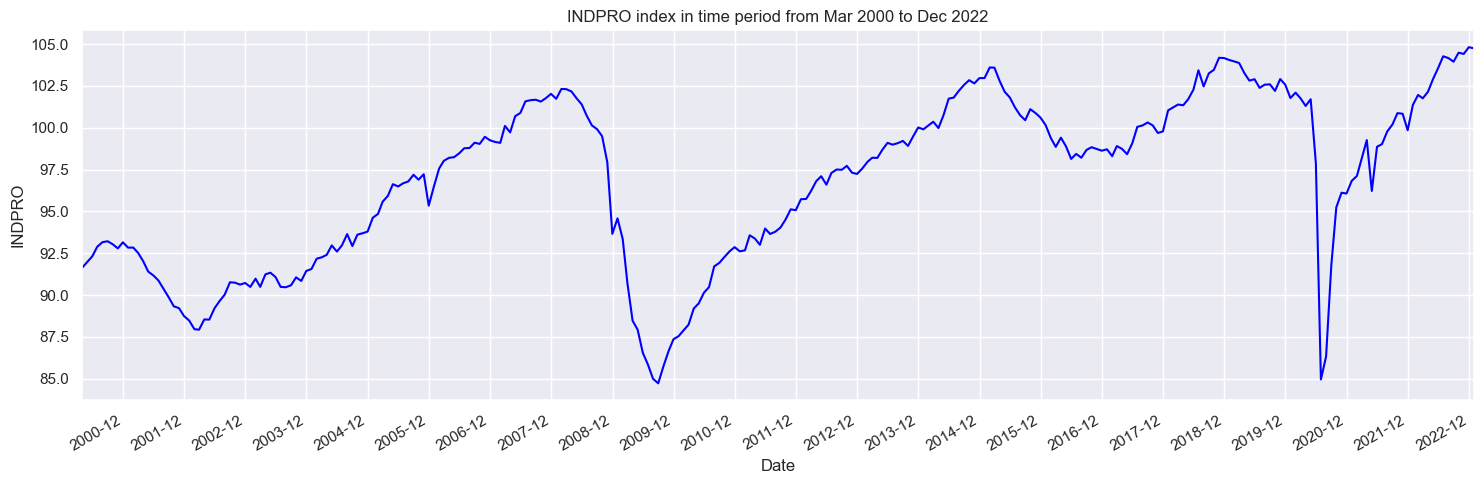

In [124]:
fig, ax = plt.subplots(figsize = [15,5])

ax = sns.lineplot(x="date", y="y", data=df, color='blue')

# labels, title, xaxis limits
start=datetime.strftime(df['date'].min(), "%b %Y")
end=datetime.strftime(df['date'].max(), "%b %Y")
ax.set_title('INDPRO index in time period from {} to {}'.format(start, end))

ax.set_ylabel('INDPRO')
ax.set_xlabel('Date')
ax.set_xlim(df['date'].min(), df['date'].max())

# Major ticks every last month of the year
ax.xaxis.set_major_locator(MonthLocator(bymonth=12))

# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

fig.tight_layout()

### Data standarization

In [129]:
minl = []
maxl = []

for col in df:
    minl.append(df[col].min())
    maxl.append(df[col].max())
    
range_df = pd.DataFrame([minl, maxl], columns=df.columns).drop('date', axis=1)
range_df.rename(index={0: 'min', 1: 'max'}, inplace=True)
range_df

,y,x1,x2,x3,x4,x5
min,84.7277,0.501,1.27,1017.80,-18.6,115232
max,104.8129,4.049,6.63,3812.55,41.2,405948


### Time series analysis

#### Decomposition

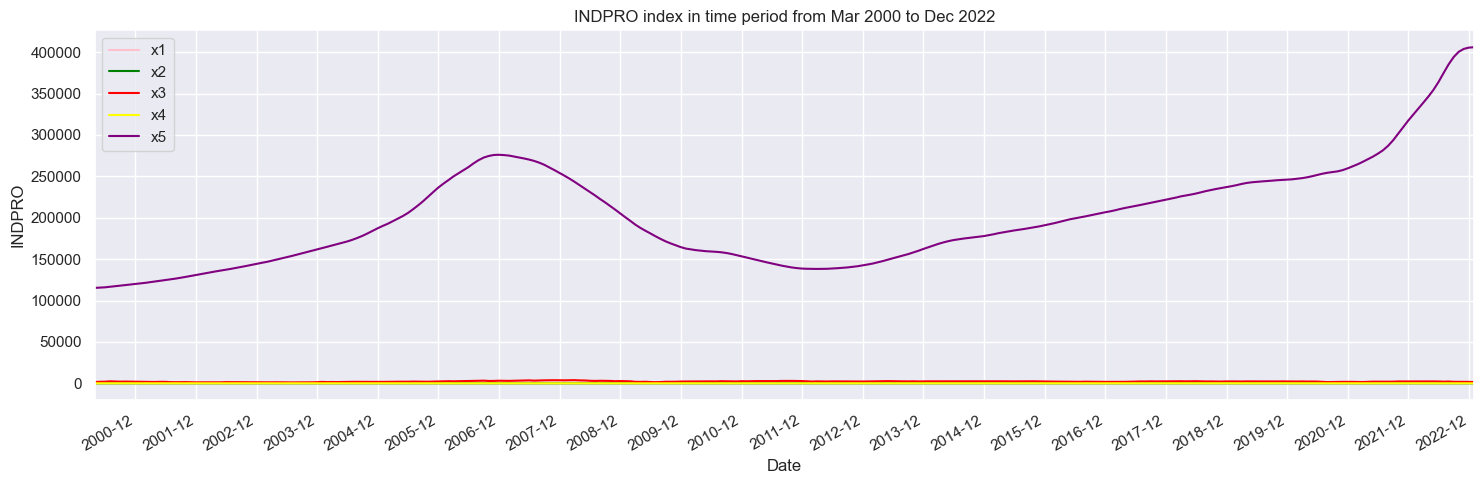

In [123]:
fig, ax = plt.subplots(figsize = [15,5])

ax = sns.lineplot(x="date", y="x1", data=df, color='pink', label='x1')
ax = sns.lineplot(x="date", y="x2", data=df, color='green', label='x2')
ax = sns.lineplot(x="date", y="x3", data=df, color='red', label='x3')
ax = sns.lineplot(x="date", y="x4", data=df, color='yellow', label='x4')
ax = sns.lineplot(x="date", y="x5", data=df, color='purple', label='x5')

# labels, title, xaxis limits
start=datetime.strftime(df['date'].min(), "%b %Y")
end=datetime.strftime(df['date'].max(), "%b %Y")
ax.set_title('INDPRO index in time period from {} to {}'.format(start, end))

ax.set_ylabel('INDPRO')
ax.set_xlabel('Date')
ax.set_xlim(df['date'].min(), df['date'].max())
ax.legend()

# Major ticks every last month of the year
ax.xaxis.set_major_locator(MonthLocator(bymonth=12))

# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

fig.tight_layout()

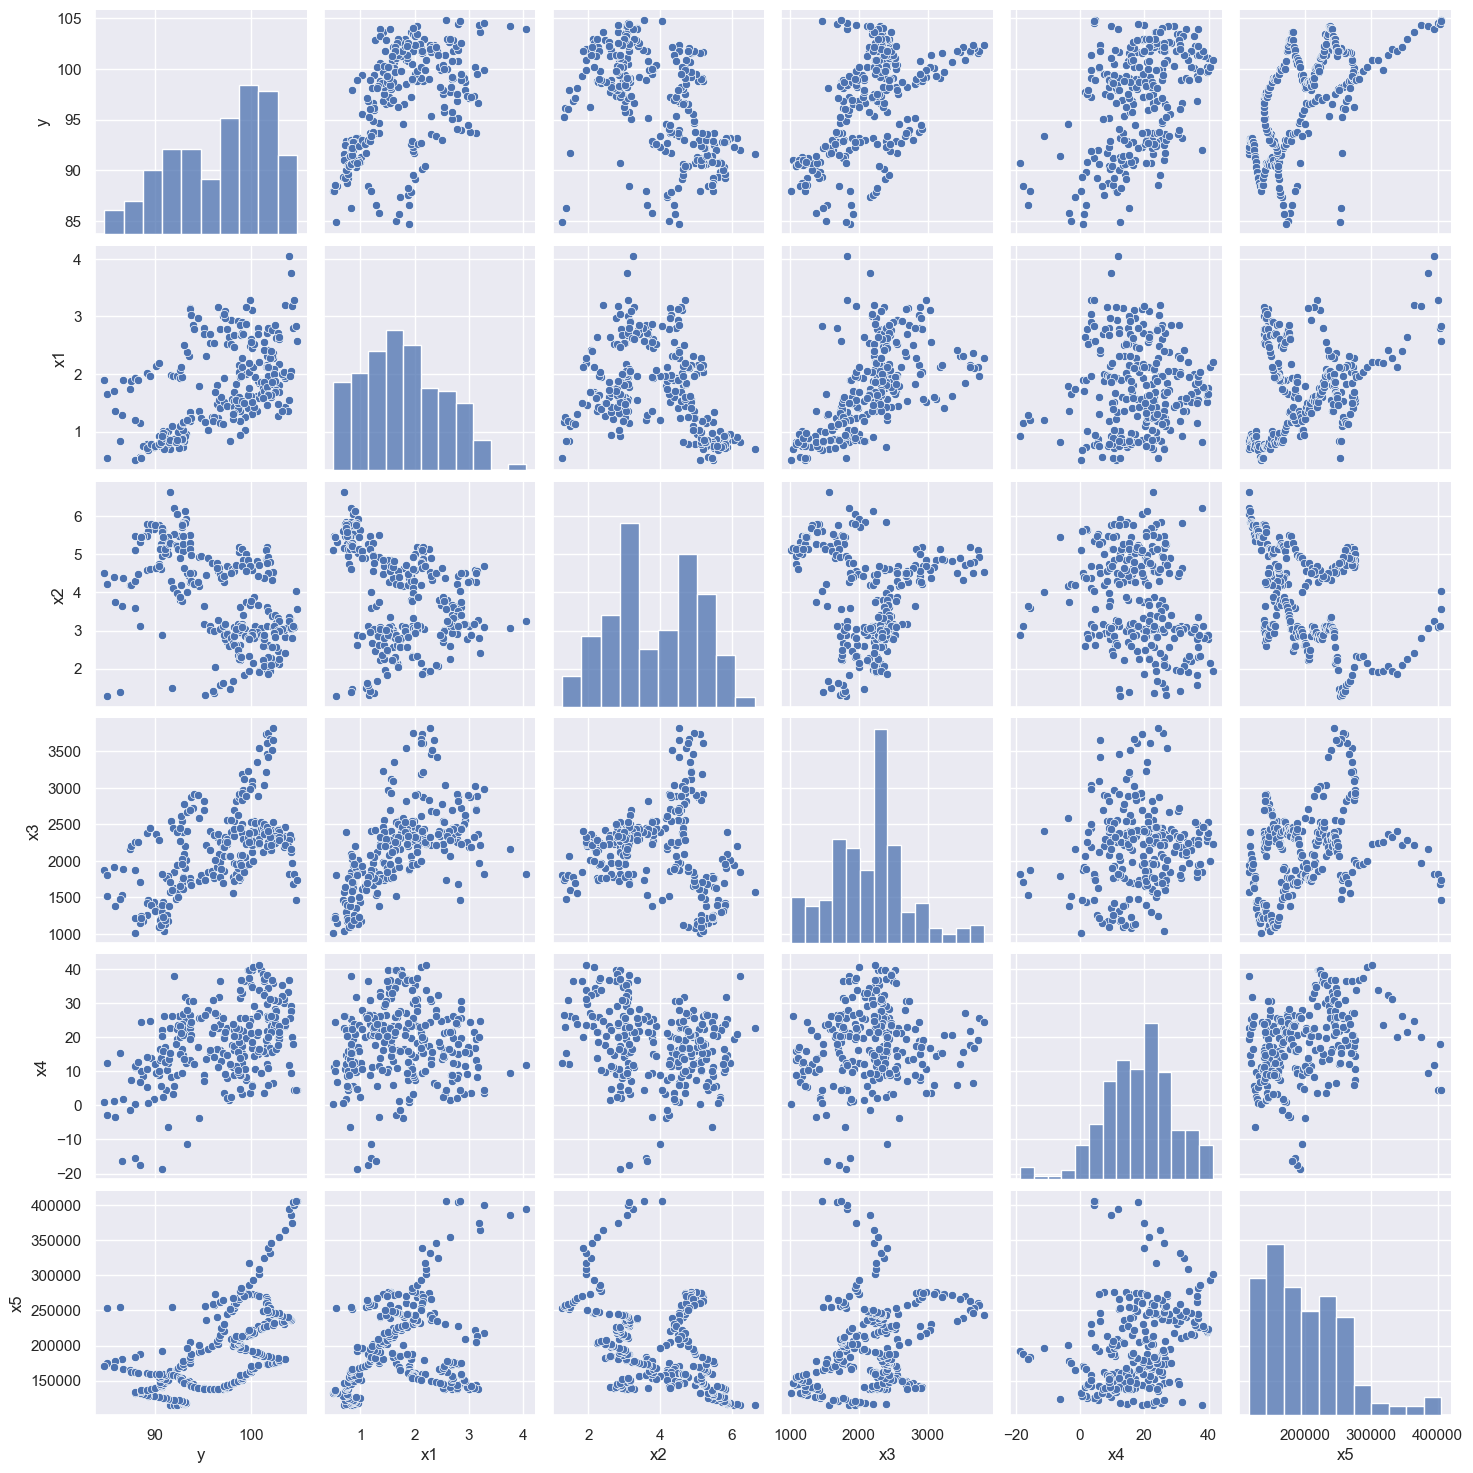

In [117]:
sns.pairplot(df)

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,y,x1,x2,x3,x4,x5
y,1.000000,0.515692,-0.515196,0.537522,0.446517,0.615794
x1,0.515692,1.000000,-0.326310,0.595855,0.018548,0.296016
x2,-0.515196,-0.326310,1.000000,-0.093061,-0.260306,-0.454749
x3,0.537522,0.595855,-0.093061,1.000000,0.123368,0.276533
x4,0.446517,0.018548,-0.260306,0.123368,1.000000,0.264020
x5,0.615794,0.296016,-0.454749,0.276533,0.264020,1.000000


In [11]:
end = "01-12-2022"
start = datetime.strptime(end, "%d-%m-%Y") - DateOffset(months=12*22 + 10)
start = datetime.strftime(start, "%d-%m-%Y")
start

'01-02-2000'